In [2]:
from jmetal.algorithm.multiobjective import RandomSearch, NSGAII, SPEA2, MOEAD, IBEA
from jmetal.operator.crossover import SBXCrossover, DifferentialEvolutionCrossover
from jmetal.operator.mutation import PolynomialMutation
from jmetal.problem import Kursawe
from jmetal.problem.multiobjective.constrained import Binh2
from jmetal.problem.multiobjective.dtlz import DTLZ2, DTLZ7
from jmetal.util.aggregation_function import PenaltyBoundaryIntersection
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.solution import get_non_dominated_solutions, print_function_values_to_file
from jmetal.core.quality_indicator import HyperVolume, NormalizedHyperVolume, InvertedGenerationalDistance
import numpy as np
import matplotlib.pyplot as plt

def execute_analysis(problem, algorithm_max_evaluations, algorithm_per_problem_iterations):
    problem_name = problem.name() 
    ref_front = np.loadtxt(f"resources/reference_fronts/{problem_name}.pf")
    pop_size = 100
    off_size = 100
    cro = 0.7
    mut = 0.5

    nsgaII = NSGAII(
            problem=problem,
            population_size=pop_size,
            offspring_population_size=off_size,
            mutation=PolynomialMutation(mut, distribution_index=20),
            crossover=SBXCrossover(probability=cro, distribution_index=20),
            termination_criterion=StoppingByEvaluations(max_evaluations=algorithm_max_evaluations))

    spea2 = SPEA2(
            problem=problem,
            population_size=pop_size,
            offspring_population_size=off_size,
            mutation=PolynomialMutation(mut, distribution_index=20),
            crossover=SBXCrossover(probability=cro, distribution_index=20),
            termination_criterion=StoppingByEvaluations(max_evaluations=algorithm_max_evaluations))
    
    moead = MOEAD(
            problem=problem,
            population_size=pop_size,
            crossover=DifferentialEvolutionCrossover(CR=1.0, F=0.5),
            mutation=PolynomialMutation(mut, distribution_index=20),
            aggregation_function=PenaltyBoundaryIntersection(dimension=problem.number_of_objectives()),
            neighbor_size=20,
            neighbourhood_selection_probability=0.9,
            max_number_of_replaced_solutions=2,
            weight_files_path="resources/MOEAD_weights",
            termination_criterion=StoppingByEvaluations(max_evaluations=algorithm_max_evaluations))

    ibea = IBEA(
           problem=problem,
           kappa=0.05,
           population_size=pop_size,
           offspring_population_size=off_size,
           mutation=PolynomialMutation(mut, distribution_index=20),
           crossover=SBXCrossover(probability=cro, distribution_index=20),
           termination_criterion=StoppingByEvaluations(max_evaluations=algorithm_max_evaluations))
    
    algorithms = [nsgaII, spea2, moead, ibea]

    for algorithm in algorithms:
        for i in range(algorithm_per_problem_iterations):
            algorithm.run()
            front = get_non_dominated_solutions(algorithm.result())
            filepath = f'results/comparative_analysis/FUN.{algorithm.get_name()}.{problem_name}.{i}'
            print_function_values_to_file(front, filepath)

            aprx_front = np.loadtxt(filepath)

            hv_ref_point = np.max(ref_front, axis=0) + 0.1
            nhv = NormalizedHyperVolume(hv_ref_point, ref_front)
            hv = HyperVolume(hv_ref_point)
            igd = InvertedGenerationalDistance(ref_front)
            print(f'{algorithm.get_name()}, {problem_name}, iteration = {i}, HV = {hv.compute(aprx_front.reshape(-1, problem.number_of_objectives()))}, nHV = {nhv.compute(aprx_front.reshape(-1, problem.number_of_objectives()))}, IGD = {igd.compute(aprx_front.reshape(-1, problem.number_of_objectives()))}')
            


In [31]:
algorithm_max_evaluations = 10000
algorithm_per_problem_iterations = 10

In [32]:
problem = Kursawe()

In [33]:
execute_analysis(problem, algorithm_max_evaluations, algorithm_per_problem_iterations)

[2025-11-06 12:08:38,759] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:38,762] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:38,765] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:38,767] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2025-11-06 12:08:41,531] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:41,538] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.0
[2025-11-06 12:08:41,552] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:41,553] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:41,554] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:41,555] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 0, HV = 27.409320500990113, nHV = 0.014433930062332179, IGD = 0.04550098260106446


[2025-11-06 12:08:45,222] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:45,226] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.1
[2025-11-06 12:08:45,242] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:45,244] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:45,246] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:45,248] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 1, HV = 27.42635013716953, nHV = 0.013821589760017461, IGD = 0.04779536754490929


[2025-11-06 12:08:47,696] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:47,700] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.2
[2025-11-06 12:08:47,714] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:47,715] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:47,717] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:47,720] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 2, HV = 27.44945200142927, nHV = 0.012990908329374773, IGD = 0.046632204448330855


[2025-11-06 12:08:50,005] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:50,013] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.3
[2025-11-06 12:08:50,024] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:50,026] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:50,030] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:50,032] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 3, HV = 27.42615637386646, nHV = 0.013828556971667183, IGD = 0.044515537273783025


[2025-11-06 12:08:53,375] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:53,382] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.4
[2025-11-06 12:08:53,396] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:53,398] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:53,400] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:53,402] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 4, HV = 27.450259284298216, nHV = 0.012961880590272479, IGD = 0.04398099527602397


[2025-11-06 12:08:55,861] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:55,869] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.5
[2025-11-06 12:08:55,894] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:55,896] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:55,899] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:55,901] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 5, HV = 27.384982943086285, nHV = 0.015309043741063788, IGD = 0.04366124262570792


[2025-11-06 12:08:58,972] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:08:58,979] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.6
[2025-11-06 12:08:58,995] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:08:58,997] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:08:59,000] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:08:59,001] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 6, HV = 27.44271308674771, nHV = 0.013233221729960998, IGD = 0.041599916776970614


[2025-11-06 12:09:01,124] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:09:01,130] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.7
[2025-11-06 12:09:01,142] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:09:01,142] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:09:01,144] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:09:01,146] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 7, HV = 27.424696630683314, nHV = 0.013881045443684514, IGD = 0.04794699462172203


[2025-11-06 12:09:03,261] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:09:03,267] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.8
[2025-11-06 12:09:03,278] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:09:03,279] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:09:03,281] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:09:03,283] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 8, HV = 27.441558674335166, nHV = 0.013274731321724742, IGD = 0.04388271011922173


[2025-11-06 12:09:05,520] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:09:05,525] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Kursawe.9
[2025-11-06 12:09:05,539] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:09:05,541] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:09:05,542] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:09:05,545] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Kursawe, iteration = 9, HV = 27.477163295194153, nHV = 0.011994484106170988, IGD = 0.0396895079350038


[2025-11-06 12:11:20,934] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:11:20,938] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.0
[2025-11-06 12:11:20,951] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:11:20,953] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:11:20,957] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:11:20,958] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 0, HV = 27.482659639791677, nHV = 0.011796850212116183, IGD = 0.03448567033186936


[2025-11-06 12:13:36,846] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:13:36,854] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.1
[2025-11-06 12:13:36,868] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:13:36,868] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:13:36,870] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:13:36,872] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 1, HV = 27.48426625170183, nHV = 0.011739080732345752, IGD = 0.035430129887007895


[2025-11-06 12:16:01,361] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:16:01,367] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.2
[2025-11-06 12:16:01,383] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:16:01,385] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:16:01,388] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:16:01,389] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 2, HV = 27.462556358230138, nHV = 0.012519710605563117, IGD = 0.03528543455924851


[2025-11-06 12:18:23,587] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:18:23,591] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.3
[2025-11-06 12:18:23,614] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:18:23,616] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:18:23,619] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:18:23,622] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 3, HV = 27.51644864937704, nHV = 0.010581887536083134, IGD = 0.033770428672747425


[2025-11-06 12:20:57,292] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:20:57,299] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.4
[2025-11-06 12:20:57,316] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:20:57,318] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:20:57,322] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:20:57,327] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 4, HV = 27.52300849900145, nHV = 0.01034601283742076, IGD = 0.03438129958405832


[2025-11-06 12:23:17,542] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:23:17,548] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.5
[2025-11-06 12:23:17,561] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:23:17,562] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:23:17,564] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:23:17,566] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 5, HV = 27.456639544838694, nHV = 0.01273246343613943, IGD = 0.03521214749955366


[2025-11-06 12:25:31,899] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:25:31,906] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.6
[2025-11-06 12:25:31,919] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:25:31,921] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:25:31,922] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:25:31,923] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 6, HV = 27.53438692307256, nHV = 0.00993687505184726, IGD = 0.03428569445565376


[2025-11-06 12:28:00,956] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:28:00,966] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.7
[2025-11-06 12:28:00,984] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:28:00,987] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:28:00,990] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:28:00,992] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 7, HV = 27.418870605088966, nHV = 0.014090533787190496, IGD = 0.035483176851640305


[2025-11-06 12:30:33,439] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:30:33,447] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.8
[2025-11-06 12:30:33,462] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:30:33,463] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:30:33,465] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:30:33,467] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 8, HV = 27.429752954313486, nHV = 0.013699233530166222, IGD = 0.036977293437335565


[2025-11-06 12:33:02,270] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:02,278] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Kursawe.9
[2025-11-06 12:33:02,297] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:02,299] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:02,301] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:02,303] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Kursawe, iteration = 9, HV = 27.40664044735983, nHV = 0.014530297643700063, IGD = 0.03542042946236754


[2025-11-06 12:33:06,106] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:06,111] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.0
[2025-11-06 12:33:06,122] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:06,123] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:06,124] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:06,127] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 0, HV = 27.02210484788302, nHV = 0.028357172319918078, IGD = 0.060720161738964856


[2025-11-06 12:33:11,201] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:11,211] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.1
[2025-11-06 12:33:11,245] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:11,252] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:11,256] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:11,259] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 1, HV = 26.987534116158056, nHV = 0.029600243639391843, IGD = 0.056335232114040526


[2025-11-06 12:33:17,745] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:17,749] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.2
[2025-11-06 12:33:17,762] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:17,764] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:17,765] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:17,766] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 2, HV = 27.095352672247646, nHV = 0.02572337589333684, IGD = 0.05748806219676971


[2025-11-06 12:33:22,025] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:22,028] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.3
[2025-11-06 12:33:22,045] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:22,047] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:22,049] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:22,051] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 3, HV = 27.095702496482485, nHV = 0.025710797146764608, IGD = 0.05801209491820608


[2025-11-06 12:33:29,133] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:29,139] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.4
[2025-11-06 12:33:29,169] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:29,172] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:29,177] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:29,179] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 4, HV = 26.89339571493672, nHV = 0.03298520949867234, IGD = 0.06989350079142094


[2025-11-06 12:33:33,215] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:33,221] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.5
[2025-11-06 12:33:33,235] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:33,236] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:33,238] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:33,242] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 5, HV = 27.134235175230298, nHV = 0.024325264778084388, IGD = 0.05946590436816461


[2025-11-06 12:33:37,185] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:37,191] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.6
[2025-11-06 12:33:37,206] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:37,209] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:37,212] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:37,213] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 6, HV = 27.00547800152271, nHV = 0.02895502937449912, IGD = 0.060422175949616595


[2025-11-06 12:33:44,278] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:44,285] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.7
[2025-11-06 12:33:44,302] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:44,389] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:44,391] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:44,393] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 7, HV = 27.028546352361555, nHV = 0.02812555299709818, IGD = 0.05638790964800075


[2025-11-06 12:33:48,383] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:48,388] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.8
[2025-11-06 12:33:48,403] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:48,405] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:48,406] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:48,409] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 8, HV = 26.923932564728503, nHV = 0.03188718581594452, IGD = 0.05719661543125558


[2025-11-06 12:33:52,567] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:33:52,572] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Kursawe.9
[2025-11-06 12:33:52,596] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:33:52,686] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:33:52,689] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:33:52,691] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Kursawe, iteration = 9, HV = 26.925982409101366, nHV = 0.031813478878828905, IGD = 0.05952895925351589


[2025-11-06 12:34:23,767] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:34:23,773] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.0
[2025-11-06 12:34:23,791] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:34:23,850] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:34:23,852] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:34:23,855] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 0, HV = 27.55990196764374, nHV = 0.009019422092683471, IGD = 0.03923104269417133


[2025-11-06 12:34:59,189] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:34:59,201] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.1
[2025-11-06 12:34:59,218] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:34:59,269] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:34:59,270] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:34:59,271] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 1, HV = 27.534917074020655, nHV = 0.009917812237562273, IGD = 0.041143109602097314


[2025-11-06 12:35:33,410] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:35:33,414] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.2
[2025-11-06 12:35:33,430] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:35:33,478] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:35:33,480] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:35:33,481] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 2, HV = 27.57970618129628, nHV = 0.008307315383688785, IGD = 0.041119987668550725


[2025-11-06 12:36:05,802] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:36:05,811] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.3
[2025-11-06 12:36:05,825] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:36:05,870] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:36:05,871] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:36:05,872] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 3, HV = 27.53996526648761, nHV = 0.009736292698989124, IGD = 0.041940397740232484


[2025-11-06 12:36:43,198] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:36:43,203] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.4
[2025-11-06 12:36:43,223] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:36:43,276] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:36:43,280] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:36:43,281] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 4, HV = 27.545408955730515, nHV = 0.009540552151064863, IGD = 0.040466937279754416


[2025-11-06 12:37:54,763] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:37:54,770] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.5
[2025-11-06 12:37:54,785] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:37:54,830] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:37:54,832] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:37:54,833] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 5, HV = 27.49551516597415, nHV = 0.011334599773759502, IGD = 0.041924038363333076


[2025-11-06 12:38:26,446] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:38:26,452] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.6
[2025-11-06 12:38:26,467] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:38:26,524] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:38:26,528] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:38:26,531] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 6, HV = 27.4681425902638, nHV = 0.012318844599016998, IGD = 0.040523356363936044


[2025-11-06 12:38:51,030] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:38:51,038] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.7
[2025-11-06 12:38:51,049] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:38:51,090] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:38:51,091] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:38:51,092] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 7, HV = 27.5509669422536, nHV = 0.009340701777754035, IGD = 0.03887963607695871


[2025-11-06 12:39:14,264] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:14,271] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.8
[2025-11-06 12:39:14,282] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:14,323] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:14,324] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:14,325] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Kursawe, iteration = 8, HV = 27.53730773952451, nHV = 0.00983185028147926, IGD = 0.039229934843733966


[2025-11-06 12:39:39,514] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:39,519] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Kursawe.9


Epsilon-IBEA, Kursawe, iteration = 9, HV = 27.55654885118132, nHV = 0.009139991218568677, IGD = 0.042004029736876794


In [34]:
problem = Binh2()

In [35]:
execute_analysis(problem, algorithm_max_evaluations, algorithm_per_problem_iterations)

[2025-11-06 12:39:39,766] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:39,767] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:39,768] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:39,769] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2025-11-06 12:39:41,822] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:41,828] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.0
[2025-11-06 12:39:41,852] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:41,853] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:41,854] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:41,856] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 0, HV = 2160.053915139467, nHV = 0.014231811585879828, IGD = 0.4787353480106585


[2025-11-06 12:39:43,837] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:43,843] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.1
[2025-11-06 12:39:43,868] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:43,869] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:43,870] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:43,872] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 1, HV = 2160.9421202805474, nHV = 0.01382646782722341, IGD = 0.45856694687477895


[2025-11-06 12:39:45,894] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:45,899] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.2
[2025-11-06 12:39:45,923] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:45,924] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:45,926] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:45,929] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 2, HV = 2161.4274116916063, nHV = 0.013604998894536369, IGD = 0.4202183091234157


[2025-11-06 12:39:47,973] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:47,978] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.3
[2025-11-06 12:39:48,007] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:48,008] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:48,009] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:48,011] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 3, HV = 2162.703070924453, nHV = 0.013022835513250564, IGD = 0.42480470621125654


[2025-11-06 12:39:50,010] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:50,016] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.4
[2025-11-06 12:39:50,050] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:50,051] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:50,052] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:50,054] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 4, HV = 2159.938206856973, nHV = 0.01428461653820945, IGD = 0.47166853212769505


[2025-11-06 12:39:52,053] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:52,059] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.5
[2025-11-06 12:39:52,155] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:52,156] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:52,158] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:52,159] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 5, HV = 2161.87137417766, nHV = 0.013402390944552423, IGD = 0.44080810749502825


[2025-11-06 12:39:54,138] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:54,143] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.6
[2025-11-06 12:39:54,168] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:54,169] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:54,170] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:54,171] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 6, HV = 2157.9872591998987, nHV = 0.015174956415434537, IGD = 0.4720157977831693


[2025-11-06 12:39:56,182] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:56,186] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.7
[2025-11-06 12:39:56,209] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:56,210] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:56,212] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:56,213] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 7, HV = 2161.7602273008874, nHV = 0.013453114241131381, IGD = 0.45867526655859747


[2025-11-06 12:39:58,229] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:39:58,234] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.8
[2025-11-06 12:39:58,258] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:39:58,259] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:39:58,263] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:39:58,265] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 8, HV = 2161.9977736837614, nHV = 0.013344706915800919, IGD = 0.4478960011155547


[2025-11-06 12:40:00,383] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:40:00,396] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.Binh2.9
[2025-11-06 12:40:00,427] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:40:00,430] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:40:00,432] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:40:00,433] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, Binh2, iteration = 9, HV = 2158.1112282007443, nHV = 0.015118381578794304, IGD = 0.47470935056660535


[2025-11-06 12:56:24,585] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 12:56:24,590] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.0
[2025-11-06 12:56:24,613] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 12:56:24,616] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 12:56:24,617] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 12:56:24,618] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 0, HV = 2165.019704101905, nHV = 0.011965610378937508, IGD = 0.40191076011276344


[2025-11-06 13:21:13,008] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 13:21:13,019] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.1
[2025-11-06 13:21:13,199] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 13:21:13,200] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 13:21:13,201] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 13:21:13,202] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 1, HV = 2165.212978966935, nHV = 0.011877406926129486, IGD = 0.407023603080965


[2025-11-06 13:40:43,638] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 13:40:43,643] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.2
[2025-11-06 13:40:43,675] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 13:40:43,677] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 13:40:43,678] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 13:40:43,680] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 2, HV = 2165.835988798159, nHV = 0.011593088433713428, IGD = 0.40095895978860285


[2025-11-06 13:59:06,687] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 13:59:06,692] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.3
[2025-11-06 13:59:06,825] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 13:59:06,827] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 13:59:06,829] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 13:59:06,830] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 3, HV = 2165.204428394524, nHV = 0.011881309089041614, IGD = 0.40768187807252376


[2025-11-06 14:21:55,536] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 14:21:55,543] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.4
[2025-11-06 14:21:55,572] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 14:21:55,574] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 14:21:55,576] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 14:21:55,578] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 4, HV = 2164.2060571863713, nHV = 0.012336928539244951, IGD = 0.4212034463725535


[2025-11-06 14:42:07,578] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 14:42:07,585] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.5
[2025-11-06 14:42:07,612] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 14:42:07,614] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 14:42:07,615] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 14:42:07,616] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 5, HV = 2163.777552700971, nHV = 0.012532482033229542, IGD = 0.41589398743124606


[2025-11-06 15:01:34,743] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 15:01:34,751] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.6
[2025-11-06 15:01:34,790] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 15:01:34,793] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 15:01:34,795] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 15:01:34,797] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 6, HV = 2161.7028599798655, nHV = 0.013479294550669763, IGD = 0.4393921000000597


[2025-11-06 15:21:45,840] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 15:21:45,847] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.7
[2025-11-06 15:21:45,969] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 15:21:45,970] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 15:21:45,972] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 15:21:45,973] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 7, HV = 2165.9652649824857, nHV = 0.011534091596118068, IGD = 0.39371042185076544


[2025-11-06 15:41:28,147] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 15:41:28,153] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.8
[2025-11-06 15:41:28,183] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 15:41:28,185] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 15:41:28,185] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 15:41:28,188] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 8, HV = 2160.772863820361, nHV = 0.013903710174261952, IGD = 0.45106748558200527


[2025-11-06 16:00:52,651] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:00:52,656] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.Binh2.9
[2025-11-06 16:00:52,784] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:00:52,785] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:00:52,786] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:00:52,789] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, Binh2, iteration = 9, HV = 2162.645569210109, nHV = 0.013049077154897781, IGD = 0.4390218471633139


[2025-11-06 16:00:56,330] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:00:56,336] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.0
[2025-11-06 16:00:56,367] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:00:56,370] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:00:56,372] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:00:56,374] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 0, HV = 2176.5302501755796, nHV = 0.006712625686668416, IGD = 0.25874745232741764


[2025-11-06 16:01:00,128] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:00,132] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.1
[2025-11-06 16:01:00,163] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:00,165] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:00,167] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:00,170] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 1, HV = 2176.6108823628037, nHV = 0.006675828158342556, IGD = 0.25685682879718896


[2025-11-06 16:01:03,853] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:03,862] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.2
[2025-11-06 16:01:03,896] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:03,897] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:03,898] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:03,899] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 2, HV = 2175.392488953006, nHV = 0.00723185754998612, IGD = 0.2725242925854839


[2025-11-06 16:01:10,346] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:10,355] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.3
[2025-11-06 16:01:10,389] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:10,392] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:10,394] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:10,396] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 3, HV = 2175.9426329606645, nHV = 0.006980792306662487, IGD = 0.27011293854548757


[2025-11-06 16:01:13,928] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:13,936] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.4
[2025-11-06 16:01:14,067] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:14,068] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:14,071] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:14,074] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 4, HV = 2175.3701516496003, nHV = 0.007242051463646204, IGD = 0.2729258025907393


[2025-11-06 16:01:17,622] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:17,627] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.5
[2025-11-06 16:01:17,666] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:17,668] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:17,669] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:17,671] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 5, HV = 2176.143513533492, nHV = 0.006889117891975105, IGD = 0.26757480363745295


[2025-11-06 16:01:21,247] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:21,254] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.6
[2025-11-06 16:01:21,290] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:21,292] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:21,293] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:21,295] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 6, HV = 2175.9236496846365, nHV = 0.006989455567097402, IGD = 0.27065699691992584


[2025-11-06 16:01:29,329] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:29,335] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.7
[2025-11-06 16:01:29,381] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:29,383] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:29,385] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:29,388] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 7, HV = 2176.1297198085367, nHV = 0.006895412834506454, IGD = 0.2649281170941611


[2025-11-06 16:01:33,105] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:33,111] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.8
[2025-11-06 16:01:33,139] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:33,140] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:33,141] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:33,144] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 8, HV = 2176.443191889147, nHV = 0.006752355847430502, IGD = 0.2613144249342363


[2025-11-06 16:01:36,777] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:01:36,785] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.Binh2.9
[2025-11-06 16:01:36,940] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:01:37,029] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:01:37,031] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:01:37,032] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, Binh2, iteration = 9, HV = 2176.651620303512, nHV = 0.006657236878870099, IGD = 0.25971773710719787


[2025-11-06 16:02:10,097] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:02:10,101] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.0
[2025-11-06 16:02:10,138] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:02:10,186] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:02:10,187] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:02:10,188] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 0, HV = 2173.904573909154, nHV = 0.007910886581165233, IGD = 0.2908760135917071


[2025-11-06 16:02:43,868] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:02:43,875] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.1
[2025-11-06 16:02:43,907] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:02:43,954] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:02:43,955] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:02:43,956] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 1, HV = 2173.328143940488, nHV = 0.008173947758470468, IGD = 0.2969901697313724


[2025-11-06 16:03:14,719] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:03:14,727] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.2
[2025-11-06 16:03:14,859] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:03:14,906] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:03:14,907] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:03:14,908] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 2, HV = 2174.100019780015, nHV = 0.007821692362122268, IGD = 0.2832965472899142


[2025-11-06 16:03:47,353] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:03:47,359] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.3
[2025-11-06 16:03:47,388] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:03:47,434] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:03:47,435] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:03:47,436] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 3, HV = 2174.247330735812, nHV = 0.0077544651262594355, IGD = 0.2844484047802042


[2025-11-06 16:04:18,268] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:04:18,274] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.4
[2025-11-06 16:04:18,303] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:04:18,350] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:04:18,351] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:04:18,352] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 4, HV = 2174.053145635332, nHV = 0.007843083976638798, IGD = 0.29422550781160894


[2025-11-06 16:04:50,932] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:04:50,937] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.5
[2025-11-06 16:04:50,966] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:04:51,019] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:04:51,022] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:04:51,028] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 5, HV = 2173.707968599495, nHV = 0.008000609924909918, IGD = 0.28397660548051123


[2025-11-06 16:05:21,263] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:05:21,269] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.6
[2025-11-06 16:05:21,400] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:05:21,446] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:05:21,447] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:05:21,447] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 6, HV = 2172.0930618514526, nHV = 0.008737593242001185, IGD = 0.3277485125249265


[2025-11-06 16:05:54,530] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:05:54,536] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.7
[2025-11-06 16:05:54,566] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:05:54,627] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:05:54,629] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:05:54,631] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 7, HV = 2175.140449293141, nHV = 0.007346879067352874, IGD = 0.26837839884079523


[2025-11-06 16:06:25,153] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:06:25,159] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.8
[2025-11-06 16:06:25,188] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:06:25,242] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:06:25,244] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:06:25,245] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, Binh2, iteration = 8, HV = 2174.5684203690907, nHV = 0.00760793177174568, IGD = 0.2800329303591924


[2025-11-06 16:06:58,772] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:06:58,778] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.Binh2.9


Epsilon-IBEA, Binh2, iteration = 9, HV = 2174.184755763244, nHV = 0.007783022014083318, IGD = 0.2814271425177074


In [36]:
algorithm_max_evaluations = 100000

In [37]:
problem = DTLZ2()

In [ ]:
execute_analysis(problem, algorithm_max_evaluations, algorithm_per_problem_iterations)

[2025-11-06 16:06:59,355] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:06:59,357] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:06:59,360] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:06:59,361] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2025-11-06 16:07:30,111] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:07:30,118] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.0
[2025-11-06 16:08:17,137] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:08:17,141] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:08:17,143] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:08:17,145] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 0, HV = 0.6531172711044104, nHV = 0.1808059420652518, IGD = 0.08297150629962928


[2025-11-06 16:08:45,859] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:08:45,868] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.1
[2025-11-06 16:09:34,904] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:09:34,907] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:09:34,910] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:09:34,912] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 1, HV = 0.6535855056422031, nHV = 0.1802186433241988, IGD = 0.08100556182794898


[2025-11-06 16:10:06,594] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:10:06,601] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.2
[2025-11-06 16:10:52,252] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:10:52,253] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:10:52,256] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:10:52,257] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 2, HV = 0.6450021970006683, nHV = 0.19098454364203188, IGD = 0.09622669508056786


[2025-11-06 16:11:22,234] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:11:22,240] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.3
[2025-11-06 16:12:07,898] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:12:07,900] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:12:07,902] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:12:07,904] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 3, HV = 0.655778503036201, nHV = 0.1774680034104944, IGD = 0.08659344082227104


[2025-11-06 16:12:39,023] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:12:39,029] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.4
[2025-11-06 16:13:23,425] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:13:23,427] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:13:23,429] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:13:23,431] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 4, HV = 0.651097956158252, nHV = 0.18333873499261477, IGD = 0.08257654006084028


[2025-11-06 16:13:53,161] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:13:53,170] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.5
[2025-11-06 16:14:46,382] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:14:46,384] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:14:46,386] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:14:46,387] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 5, HV = 0.6762938511641161, nHV = 0.15173594574429294, IGD = 0.08165590021158065


[2025-11-06 16:15:16,871] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:15:16,877] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.6
[2025-11-06 16:15:59,477] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:15:59,479] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:15:59,482] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:15:59,483] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 6, HV = 0.6497801560435915, nHV = 0.1849916296123667, IGD = 0.0836001503737562


[2025-11-06 16:16:40,509] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:16:40,520] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.7
[2025-11-06 16:17:27,273] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:17:27,274] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:17:27,276] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:17:27,279] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 7, HV = 0.6454108199775991, nHV = 0.19047201468368535, IGD = 0.08375519434019162


[2025-11-06 16:18:00,813] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:18:00,818] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.8
[2025-11-06 16:18:45,980] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:18:45,983] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:18:45,984] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:18:45,985] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 8, HV = 0.668758236927988, nHV = 0.16118774051108276, IGD = 0.07856358644638944


[2025-11-06 16:19:15,890] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 16:19:15,895] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ2.9
[2025-11-06 16:20:12,358] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 16:20:12,360] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 16:20:12,362] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 16:20:12,363] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ2, iteration = 9, HV = 0.6532127611485635, nHV = 0.18068617050167046, IGD = 0.09013616299379253


[2025-11-06 18:17:42,116] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 18:17:42,123] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ2.0
[2025-11-06 18:18:24,085] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 18:18:24,088] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 18:18:24,090] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 18:18:24,091] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ2, iteration = 0, HV = 0.6694174912679283, nHV = 0.16036084883046076, IGD = 0.07510946704951785


[2025-11-06 20:27:39,875] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-06 20:27:39,887] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ2.1
[2025-11-06 20:28:28,432] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-06 20:28:28,434] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-06 20:28:28,436] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-06 20:28:28,446] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ2, iteration = 1, HV = 0.6553905260046371, nHV = 0.17795463650524457, IGD = 0.07884690978601669


In [40]:
problem = DTLZ7()

In [41]:
execute_analysis(problem, algorithm_max_evaluations, algorithm_per_problem_iterations)

[2025-11-08 08:13:53,124] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:13:53,133] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:13:53,244] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:13:53,260] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2025-11-08 08:14:26,041] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:14:26,049] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.0
[2025-11-08 08:14:26,209] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:14:26,209] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:14:26,217] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:14:26,223] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 0, HV = 0.9530136632286377, nHV = 0.2825437960993723, IGD = 0.1422183468115182


[2025-11-08 08:15:01,574] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:15:01,592] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.1
[2025-11-08 08:15:01,745] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:15:01,748] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:15:01,748] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:15:01,754] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 1, HV = 0.8864002756157304, nHV = 0.3326922777526219, IGD = 0.1568610008756749


[2025-11-08 08:15:32,759] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:15:32,769] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.2
[2025-11-08 08:15:32,879] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:15:32,879] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:15:32,879] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:15:32,889] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 2, HV = 0.9161451677046863, nHV = 0.3102994641057768, IGD = 0.1409891803889104


[2025-11-08 08:16:04,183] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:16:04,192] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.3
[2025-11-08 08:16:04,309] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:16:04,309] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:16:04,318] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:16:04,318] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 3, HV = 0.9017842924887268, nHV = 0.3211107456379084, IGD = 0.1526291118939133


[2025-11-08 08:16:36,932] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:16:36,940] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.4
[2025-11-08 08:16:37,121] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:16:37,130] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:16:37,130] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:16:37,139] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 4, HV = 0.9094725652401059, nHV = 0.31532279191217716, IGD = 0.14514445220881939


[2025-11-08 08:17:06,845] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:17:06,854] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.5
[2025-11-08 08:17:07,015] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:17:07,015] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:17:07,019] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:17:07,023] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 5, HV = 0.8587122995824833, nHV = 0.3535365855993807, IGD = 0.16914322224758346


[2025-11-08 08:17:39,875] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:17:39,884] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.6
[2025-11-08 08:17:40,031] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:17:40,031] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:17:40,031] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:17:40,040] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 6, HV = 0.8719652703557313, nHV = 0.3435593665224079, IGD = 0.1538680287673479


[2025-11-08 08:18:09,392] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:18:09,398] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.7
[2025-11-08 08:18:09,518] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:18:09,520] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:18:09,522] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:18:09,528] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 7, HV = 0.8983248331738332, nHV = 0.32371512650187595, IGD = 0.14128939110156452


[2025-11-08 08:18:39,914] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:18:39,919] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.8
[2025-11-08 08:18:40,018] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:18:40,020] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:18:40,022] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:18:40,022] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 8, HV = 0.8669662822967689, nHV = 0.3473227490787263, IGD = 0.16311066314498046


[2025-11-08 08:19:10,632] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 08:19:10,638] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.NSGAII.DTLZ7.9
[2025-11-08 08:19:10,771] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 08:19:10,771] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 08:19:10,777] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 08:19:10,777] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


NSGAII, DTLZ7, iteration = 9, HV = 0.9336340882804446, nHV = 0.29713329970463453, IGD = 0.1269243246449121


[2025-11-08 09:03:57,825] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 09:03:57,835] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.0
[2025-11-08 09:03:57,945] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 09:03:57,945] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 09:03:57,945] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 09:03:57,945] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 0, HV = 1.0586718599252578, nHV = 0.20300125475098396, IGD = 0.09853568875630322


[2025-11-08 09:47:15,289] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 09:47:15,294] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.1
[2025-11-08 09:47:15,414] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 09:47:15,421] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 09:47:15,421] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 09:47:15,426] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 1, HV = 1.0357898467000801, nHV = 0.22022749502389116, IGD = 0.09801084588059618


[2025-11-08 10:31:35,425] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 10:31:35,436] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.2
[2025-11-08 10:31:35,545] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 10:31:35,545] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 10:31:35,545] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 10:31:35,558] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 2, HV = 0.9982839386045554, nHV = 0.24846302561943234, IGD = 0.11385190170592294


[2025-11-08 11:24:04,445] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 11:24:04,453] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.3
[2025-11-08 11:24:04,662] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 11:24:04,666] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 11:24:04,666] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 11:24:04,670] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 3, HV = 1.005525863865622, nHV = 0.24301109517266983, IGD = 0.11102454767514303


[2025-11-08 12:09:09,000] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 12:09:09,004] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.4
[2025-11-08 12:09:09,104] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 12:09:09,108] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 12:09:09,112] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 12:09:09,116] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 4, HV = 1.016790063913171, nHV = 0.23453108012365897, IGD = 0.11231001819580924


[2025-11-08 12:53:09,520] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 12:53:09,526] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.5
[2025-11-08 12:53:09,659] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 12:53:09,662] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 12:53:09,665] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 12:53:09,665] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 5, HV = 1.015317129012453, nHV = 0.2356399480478415, IGD = 0.10622341217673505


[2025-11-08 13:38:28,739] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 13:38:28,744] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.6
[2025-11-08 13:38:28,853] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 13:38:28,856] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 13:38:28,862] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 13:38:28,867] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 6, HV = 1.0007432954382003, nHV = 0.2466115507812583, IGD = 0.10904905736141704


[2025-11-08 14:21:55,086] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 14:21:55,094] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.7
[2025-11-08 14:21:55,216] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 14:21:55,220] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 14:21:55,220] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 14:21:55,228] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 7, HV = 1.0221317653953215, nHV = 0.23050969300653157, IGD = 0.10720815349495763


[2025-11-08 15:06:47,685] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:06:47,693] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.8
[2025-11-08 15:06:47,797] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:06:47,797] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:06:47,805] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:06:47,805] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 8, HV = 1.0489278509764866, nHV = 0.2103368260453926, IGD = 0.10043924082107754


[2025-11-08 15:51:27,429] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:51:27,429] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.SPEA2.DTLZ7.9
[2025-11-08 15:51:27,526] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:51:27,541] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:51:27,541] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:51:27,541] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


SPEA2, DTLZ7, iteration = 9, HV = 1.054493616302519, nHV = 0.20614675719675857, IGD = 0.10170034052538998


[2025-11-08 15:52:21,848] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:52:21,859] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.0
[2025-11-08 15:52:22,070] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:52:22,070] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:52:22,081] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:52:22,081] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 0, HV = 0.6616586908344764, nHV = 0.5018842321780287, IGD = 0.2505978975636077


[2025-11-08 15:53:15,552] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:53:15,555] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.1
[2025-11-08 15:53:15,652] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:53:15,653] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:53:15,655] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:53:15,657] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 1, HV = 0.6784367277833991, nHV = 0.4892532414978975, IGD = 0.2574727176195531


[2025-11-08 15:54:04,748] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:54:04,751] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.2
[2025-11-08 15:54:04,865] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:54:04,868] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:54:04,868] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:54:04,871] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 2, HV = 0.6105962204099423, nHV = 0.5403255343399108, IGD = 0.27884194349707486


[2025-11-08 15:54:54,795] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:54:54,795] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.3
[2025-11-08 15:54:54,916] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:54:54,916] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:54:54,916] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:54:54,926] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 3, HV = 0.5583943716192036, nHV = 0.5796245934353655, IGD = 0.29315418219382144


[2025-11-08 15:55:43,561] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:55:43,564] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.4
[2025-11-08 15:55:43,660] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:55:43,665] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:55:43,667] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:55:43,669] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 4, HV = 0.5648167806201556, nHV = 0.5747896184927085, IGD = 0.2977774864878064


[2025-11-08 15:56:33,887] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:56:33,891] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.5
[2025-11-08 15:56:34,068] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:56:34,071] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:56:34,074] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:56:34,076] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 5, HV = 0.5894607822982455, nHV = 0.5562369024351201, IGD = 0.3032490638675001


[2025-11-08 15:57:22,918] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:57:22,922] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.6
[2025-11-08 15:57:23,026] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:57:23,026] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:57:23,026] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:57:23,026] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 6, HV = 0.6156314961330712, nHV = 0.5365348333822034, IGD = 0.2760085532760637


[2025-11-08 15:58:12,361] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:58:12,369] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.7
[2025-11-08 15:58:12,462] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:58:12,470] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:58:12,472] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:58:12,472] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 7, HV = 0.6426090523328312, nHV = 0.5162253500994312, IGD = 0.2857983519492654


[2025-11-08 15:59:01,310] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:59:01,314] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.8
[2025-11-08 15:59:01,420] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:59:01,422] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:59:01,424] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:59:01,426] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 8, HV = 0.643652958457547, nHV = 0.5154394674260077, IGD = 0.26566669519265157


[2025-11-08 15:59:49,664] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 15:59:49,665] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.MOEAD.DTLZ7.9
[2025-11-08 15:59:49,765] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 15:59:49,810] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 15:59:49,810] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 15:59:49,810] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


MOEAD, DTLZ7, iteration = 9, HV = 0.6036276117537567, nHV = 0.5455717041545156, IGD = 0.2648075771602943


[2025-11-08 16:04:13,608] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:04:13,614] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.0
[2025-11-08 16:04:13,716] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:04:13,761] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:04:13,761] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:04:13,764] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 0, HV = 1.236071553942032, nHV = 0.06944964268781806, IGD = 0.08560554922933375


[2025-11-08 16:08:33,887] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:08:33,887] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.1
[2025-11-08 16:08:33,992] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:08:34,035] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:08:34,042] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:08:34,042] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 1, HV = 1.2413143531779838, nHV = 0.06550271203742641, IGD = 0.08095529755302977


[2025-11-08 16:12:49,937] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:12:49,944] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.2
[2025-11-08 16:12:50,042] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:12:50,084] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:12:50,085] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:12:50,086] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 2, HV = 1.2337443170133697, nHV = 0.07120165384656552, IGD = 0.08264213096957425


[2025-11-08 16:17:09,534] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:17:09,543] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.3
[2025-11-08 16:17:09,660] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:17:09,705] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:17:09,705] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:17:09,705] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 3, HV = 1.0164183212299684, nHV = 0.23481093874962533, IGD = 0.3561244011165745


[2025-11-08 16:21:32,299] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:21:32,309] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.4
[2025-11-08 16:21:32,420] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:21:32,460] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:21:32,470] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:21:32,470] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 4, HV = 1.242525983083924, nHV = 0.06459056205848146, IGD = 0.08799012557682913


[2025-11-08 16:25:58,739] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:25:58,745] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.5
[2025-11-08 16:25:58,843] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:25:58,885] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:25:58,886] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:25:58,888] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 5, HV = 1.2377608306224548, nHV = 0.06817790642501564, IGD = 0.08424422738366048


[2025-11-08 16:30:24,414] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:30:24,418] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.6
[2025-11-08 16:30:24,526] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:30:24,566] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:30:24,566] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:30:24,570] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 6, HV = 1.238277173097527, nHV = 0.06778918890041796, IGD = 0.08294806751132289


[2025-11-08 16:34:48,604] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:34:48,604] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.7
[2025-11-08 16:34:48,716] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:34:48,752] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:34:48,764] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:34:48,764] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 7, HV = 1.2384292955294074, nHV = 0.06767466674117084, IGD = 0.0858047299413148


[2025-11-08 16:39:16,801] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:39:16,812] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.8
[2025-11-08 16:39:16,934] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2025-11-08 16:39:16,978] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2025-11-08 16:39:16,978] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2025-11-08 16:39:16,978] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Epsilon-IBEA, DTLZ7, iteration = 8, HV = 1.2358862808812399, nHV = 0.06958912159773278, IGD = 0.0890893032696538


[2025-11-08 16:43:45,197] [jmetal.core.algorithm] [DEBUG] Finished!
[2025-11-08 16:43:45,205] [jmetal.util.solution] [INFO] Output file (function values): results/comparative_analysis/FUN.Epsilon-IBEA.DTLZ7.9


Epsilon-IBEA, DTLZ7, iteration = 9, HV = 1.2329819378491405, nHV = 0.0717755948950578, IGD = 0.08824539344913587


Preview generated fronts

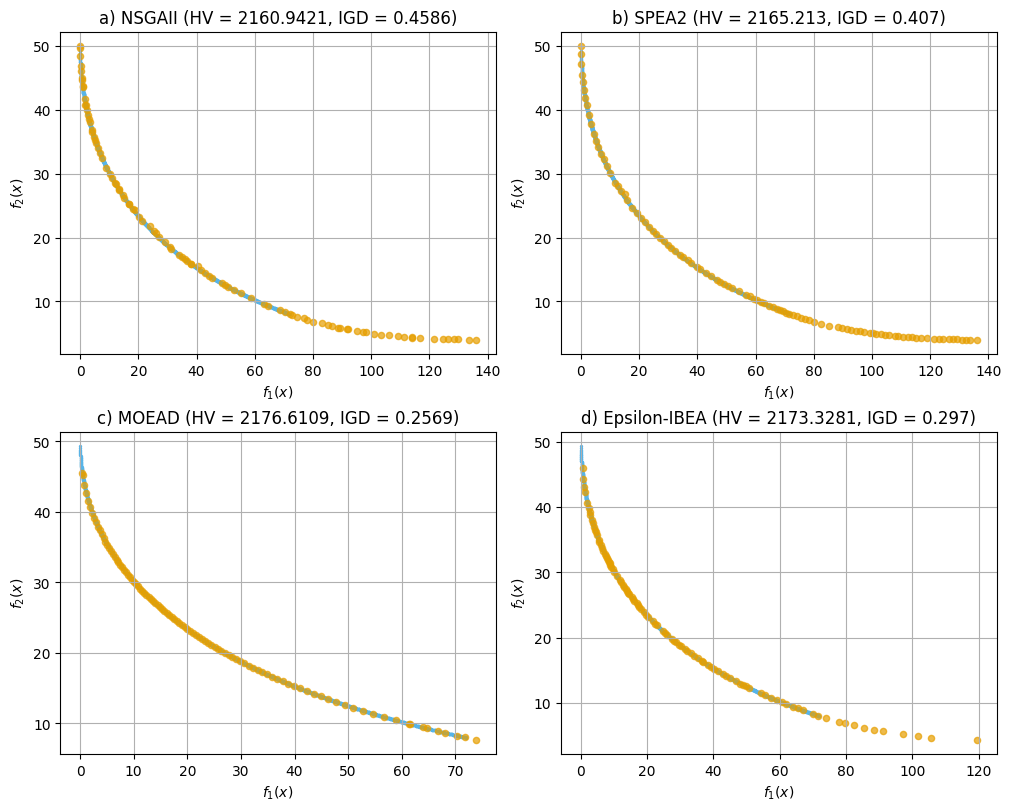

In [5]:
import plots

problem = Binh2()
plots.draw_2d_comparison(problem.name(), 1)

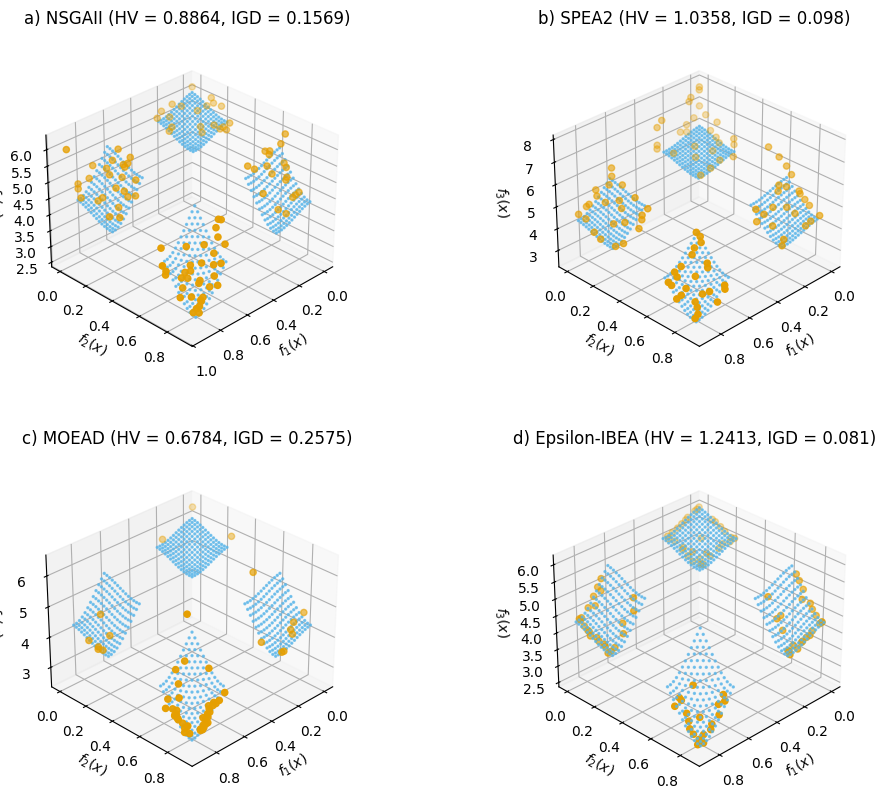

In [6]:
import plots

problem = DTLZ7()
plots.draw_3d_comparison(problem.name(), 1)